<a href="https://colab.research.google.com/github/vishnushukla1729/GenAI---BERT-and-T5-Summariation/blob/main/BERTandT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="font-size:300%; font-family:cursive; color:navy;">What is the core idea behind it?</h1></center>
<p style="font-size:150%; font-family:verdana;">What is language modeling really about? Which problem are language models trying to solve? Basically, their task is to “fill in the blank” based on context. For example, given</p>
<br>
<center><h1 style="font-size:150%; font-family:cursive;">“The woman went to the store and bought a _____ of shoes.”</h1></center>
<br>
<br>
<p style="font-size:150%; font-family:verdana;">a language model(One-Directional Approach) might complete this sentence by saying that the word “cart” would fill the blank 20% of the time and the word “pair” 80% of the time.</p>

<p style="font-size:150%; font-family:verdana;"><b>Now enters BERT</b>, a language model which is bidirectionally trained (this is also its key technical innovation). This means we can now have a deeper sense of language context and flow compared to the single-direction language models. Unlike the previous language models, it takes both the previous and next tokens into account at the same time.</p>

<p style="font-size:150%; font-family:verdana;">Moreover, BERT is based on the Transformer model architecture, instead of LSTMs.</p>





<p style="font-size:150%; font-family:verdana;">There are four types of pre-trained versions of BERT depending on the scale of the model architecture:</p>
<ol>
    <li style="font-size:150%; font-family:verdana;">BERT-Base (Cased / Un-Cased): 12-layer, 768-hidden-nodes, 12-attention-heads, 110M parameters</li>
    <li style="font-size:150%; font-family:verdana;">BERT-Large (Cased / Un-Cased): 24-layer, 1024-hidden-nodes, 16-attention-heads, 340M parameters</li>
</ol>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_encoder.png"></center>

<p style="font-size:150%; font-family:verdana;">We need to choose <b>which BERT pre-trained weights we want</b>. For example, if we don’t have access to a Google TPU, we’d rather stick with the Base models. And then the choice of “cased” vs “uncased” depends on whether we think letter casing will be helpful for the task at hand.</p>

<center><h1 style="font-size:200%; font-family:cursive;">1. <u>Text - Preprocessing</u></h1></center>
<br>
<p style="font-size:150%; font-family:verdana;">BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. For starters, every input embedding is a combination of 3 embeddings:</p>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_emnedding.png"></center>
<center><h1 style="font-size:150%; font-family:verdana;">The input representation for BERT: The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.</h1></center>
<br>
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<ul>
    <li style="font-size:150%; font-family:verdana;"><b>Token embeddings:</b> A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.</li>
    <li style="font-size:150%; font-family:verdana;"><b>Segment embeddings:</b>A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.</li>
    <li style="font-size:150%; font-family:verdana;"><b>Positional embeddings:</b>A positional embedding is added to each token to indicate its position in the sentence.</li>
</ul>
<br>
<center><h1 style="font-size:200%; font-family:cursive;">2. <u>Pre-training Tasks</u></h1></center>
<br>
<p style="font-size:190%; font-family:verdana;">BERT is pre-trained on two NLP tasks:</p>

<h1 style="font-size:170%; font-family:cursive; color:navy;"> 1. Masked Language Modelling</h1>
<ul>
    <li style="font-size:150%; font-family:verdana;">Language Modeling is the task of predicting the next word given a sequence of words. In masked language modeling instead of predicting every next token, a percentage of input tokens is masked at random and only those masked tokens are predicted.</li>
    <li style="font-size:150%; font-family:verdana;"> [MASK] Token - This is a token to denote that the token is missing</li>
    <li style="font-size:150%; font-family:verdana;"> The masked words are not always replaced with the masked token – [MASK] because then the masked tokens would never be seen before fine-tuning. Therefore, 15% of the tokens are chosen at random. And out of the 15% of the tokens selected for masking:</li>
    <br>
    <center><h1 style="font-size:150%; font-family:cursive;">80% of the tokens are actually replaced with the token [MASK].</h1></center>
    <center><h1 style="font-size:150%; font-family:cursive;">10% of the time tokens are replaced with a random token.</h1></center>
    <center><h1 style="font-size:150%; font-family:cursive;">10% of the time tokens are left unchanged.</h1></center>
</ul>
<br>
<h1 style="font-size:170%; font-family:cursive; color:navy;"> 2. Next Sentence Prediction</h1>
<ul>
    <li style="font-size:150%; font-family:verdana;">Next sentence prediction task is a binary classification task in which, given a pair of sentences, it is predicted if the second sentence is the actual next sentence of the first sentence.</li>
    <br>
    <center><img src="https://yashuseth.files.wordpress.com/2019/06/fig5.png?w=442&h=231"></center>
    <br>
    <li style="font-size:150%; font-family:verdana;">This task can be easily generated from any monolingual corpus. It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.</li>
</ul>

<center><h1 style="font-size:200%; font-family:cursive; color:navy; height:65px;">The model is trained with both Masked LM and Next Sentence Prediction together. This is to minimize the combined loss function of the two strategies — “together is better”.</h1></center>


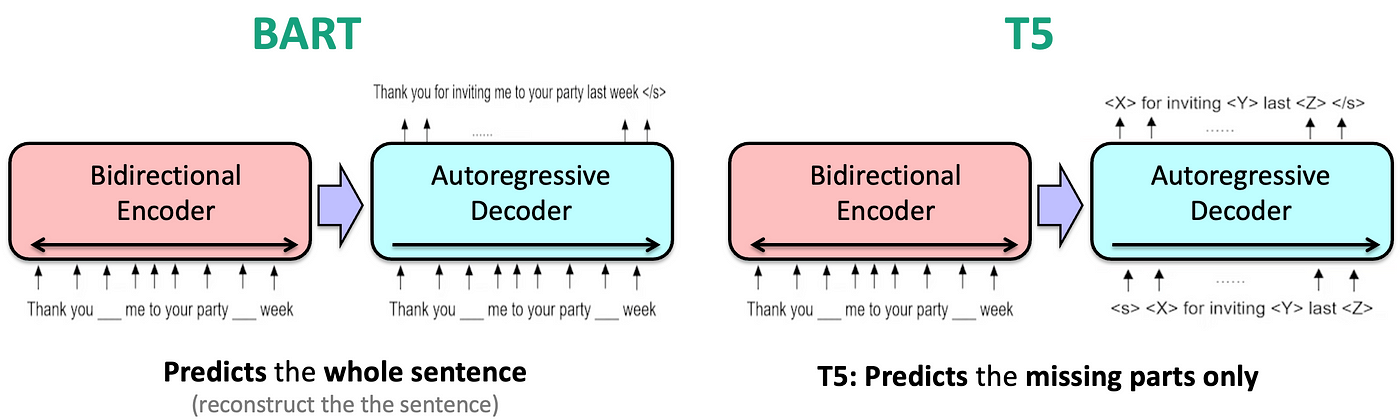

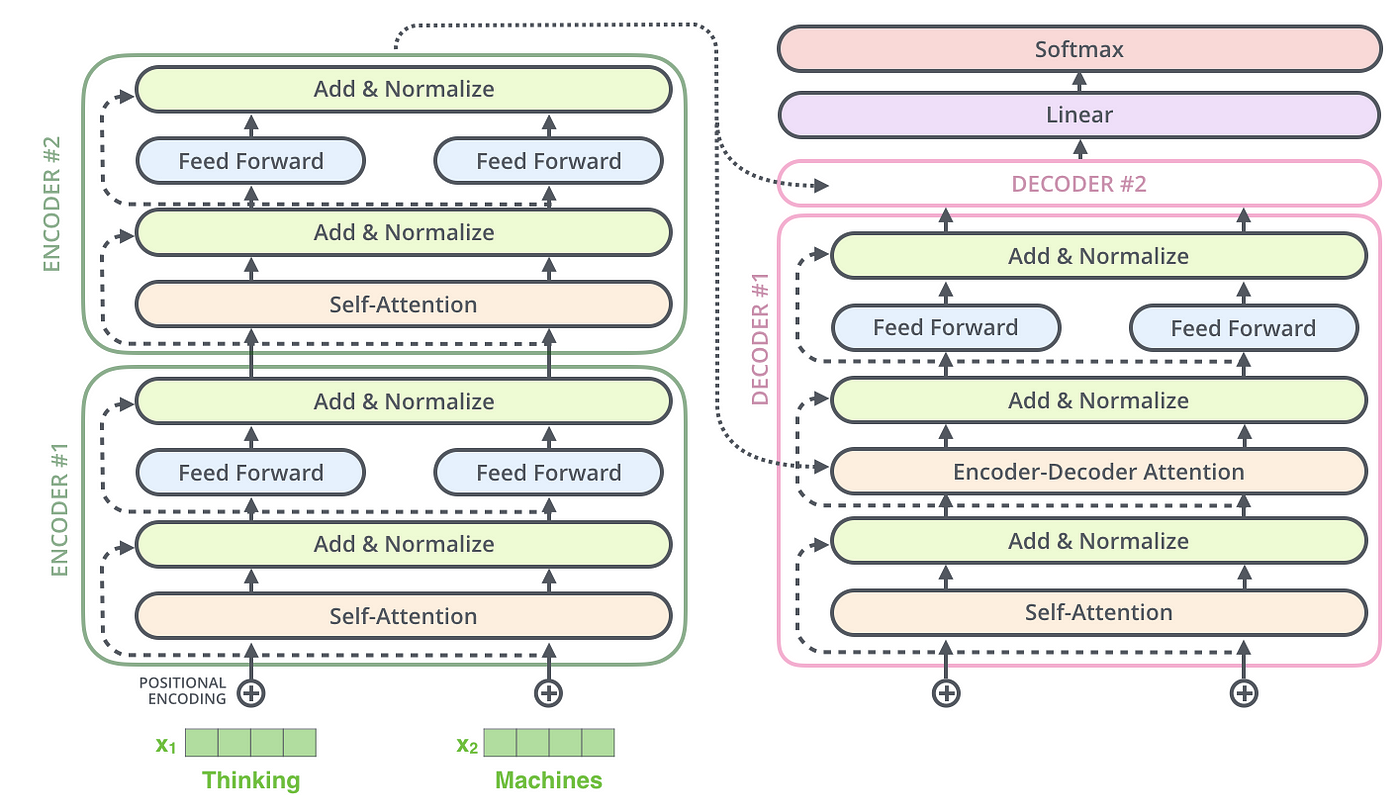

Lets Start

In [ ]:
!nvidia-smi

Tue Feb  4 22:31:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----